# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data.

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies.

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [37]:
df_data = pd.read_csv('NLSY97_subset.csv')[['EARNINGS','S', 'EXP']]

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`.

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [14]:
df_data.shape

(2000, 3)

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EARNINGS  2000 non-null   float64
 1   S         2000 non-null   int64  
 2   EXP       2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [16]:
print(f'Any NaN values? {df_data.isna().values.any()}')

Any NaN values? False


In [38]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? True


In [39]:
df_data.drop_duplicates(inplace=True)

## Descriptive Statistics

In [42]:
df_data.describe()

,EARNINGS,S,EXP
count,"1,486.00","1,486.00","1,486.00"
mean,18.81,14.56,6.70
std,12.00,2.77,2.86
min,2.00,6.00,0.00
25%,11.41,12.00,4.66
50%,15.75,15.00,6.63
75%,22.60,16.00,8.71
max,132.89,20.00,14.73


## Visualise the Features

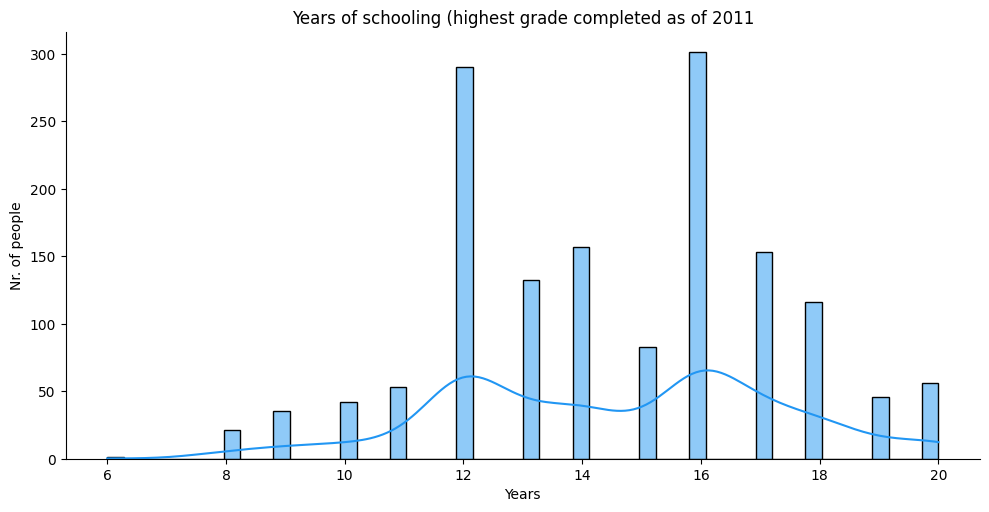

In [32]:
# Years of schooling (highest grade completed as of 2011)
sns.displot(df_data['S'],
            bins=50,
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f'Years of schooling (highest grade completed as of 2011')
plt.xlabel('Years')
plt.ylabel('Nr. of people')

plt.show()

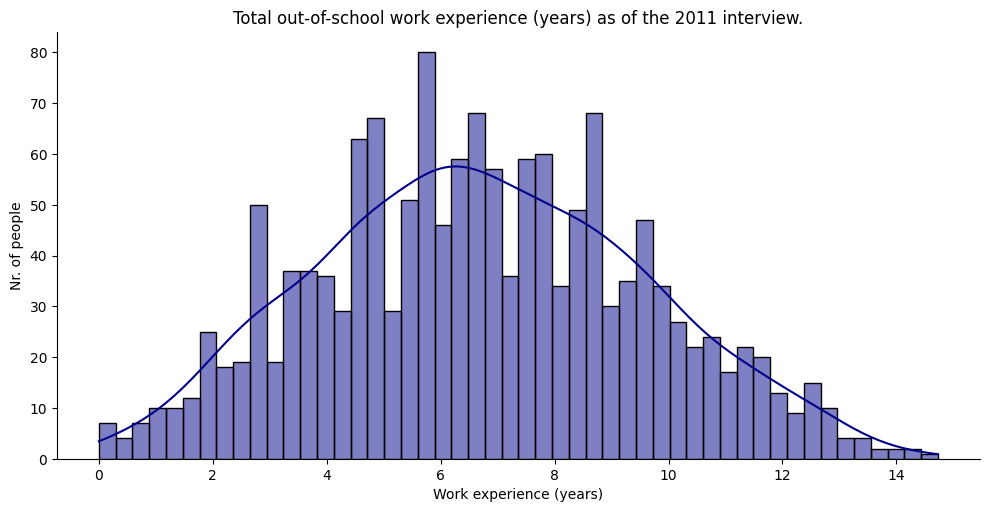

In [33]:
# Total out-of-school work experience (years) as of the 2011 interview.
sns.displot(df_data['EXP'],
            bins=50,
            aspect=2,
            kde=True,
            color='darkblue')

plt.title(f'Total out-of-school work experience (years) as of the 2011 interview.')
plt.xlabel('Work experience (years)')
plt.ylabel('Nr. of people')

plt.show()

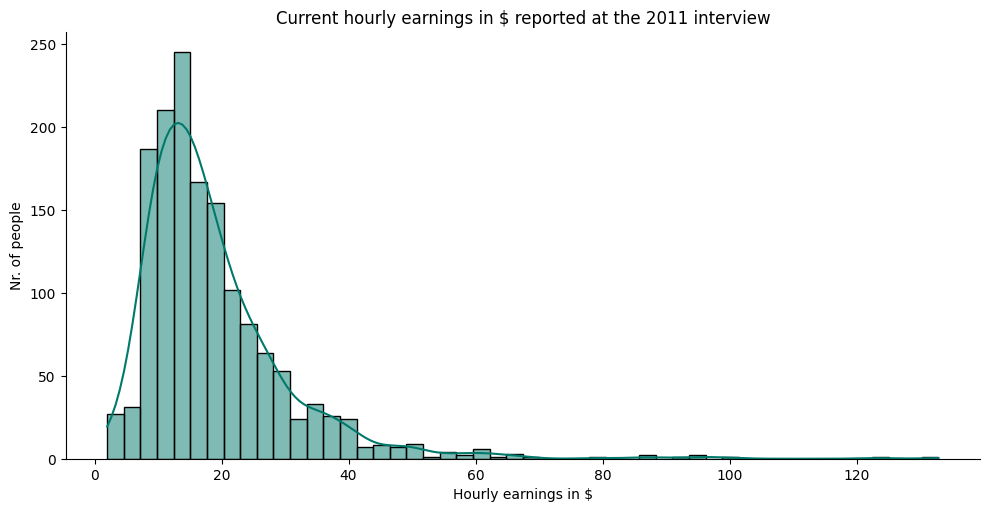

In [34]:
# Current hourly earnings in $ reported at the 2011 interview
sns.displot(df_data['EARNINGS'],
            bins=50,
            aspect=2,
            kde=True,
            color='#00796b')

plt.title(f'Current hourly earnings in $ reported at the 2011 interview')
plt.xlabel('Hourly earnings in $')
plt.ylabel('Nr. of people')

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [48]:
target = df_data['EARNINGS']
features = df_data.drop(['EARNINGS', 'EXP'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [49]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.9% of the total data.
Test data makes up the remaining 20.1%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [50]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.084


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [51]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.25


In [57]:
# Extra dollars for having an for an additional year of schooling
dollar = regr_coef.loc['S'].values[0]
print(f'{dollar:.5}$ extra dollars can one expect to earn for an additional year of schooling')

1.2501$ extra dollars can one expect to earn for an additional year of schooling


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [54]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

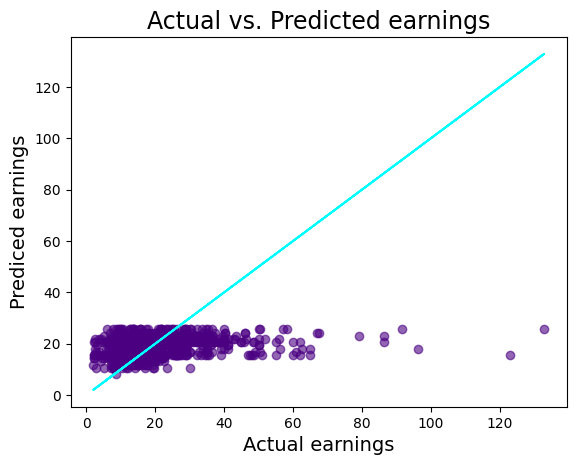

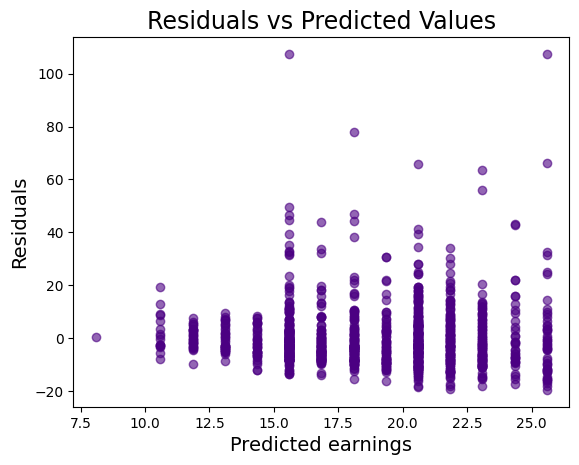

In [56]:
# Original Regression of Actual vs. Predicted earnings
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs. Predicted earnings', fontsize=17)
plt.xlabel('Actual earnings', fontsize=14)
plt.ylabel('Prediced earnings', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted earnings', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

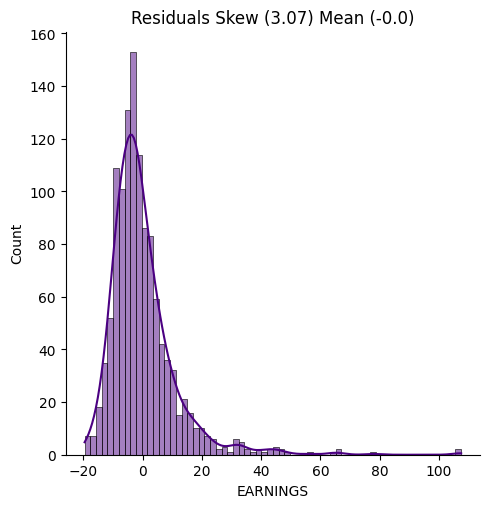

In [60]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data?

In [58]:
target = df_data['EARNINGS']
features = df_data.drop('EARNINGS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [59]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.9% of the total data.
Test data makes up the remaining 20.1%.


In [61]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.12


### Evaluate the Coefficients of the Model

In [62]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.82
EXP,0.96


### Analyse the Estimated Values & Regression Residuals

In [63]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

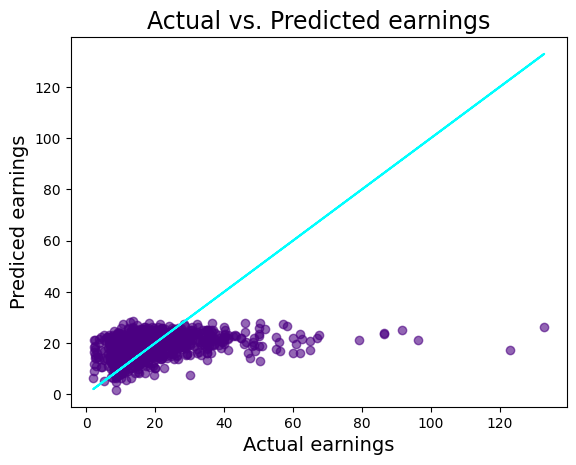

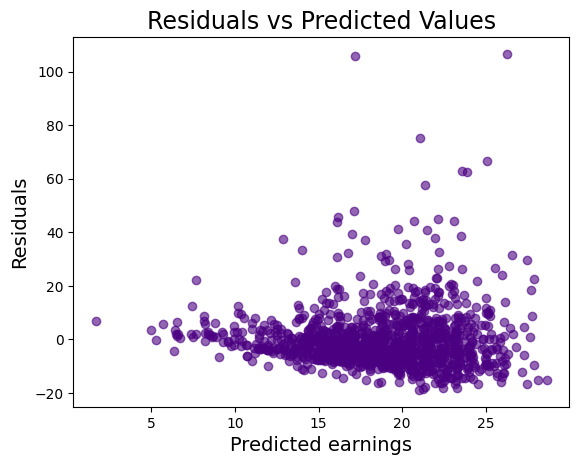

In [64]:
# Original Regression of Actual vs. Predicted earnings
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs. Predicted earnings', fontsize=17)
plt.xlabel('Actual earnings', fontsize=14)
plt.ylabel('Prediced earnings', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted earnings', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

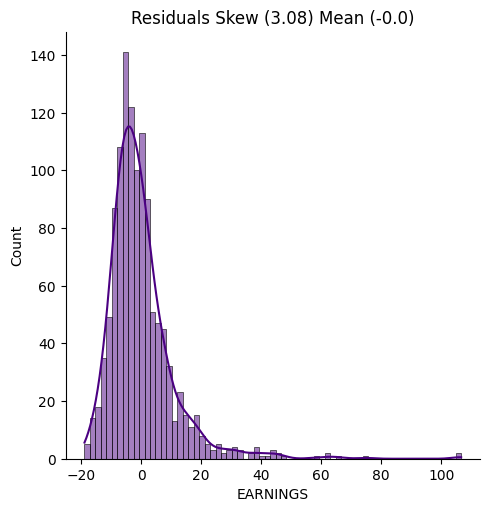

In [65]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [67]:
s = 16
exp = 5

In [69]:
new_features = pd.DataFrame(columns=['S', 'EXP'], data=[['16', '5']])
new_prediction = regr.predict(new_features)[0]
print(f"A person with schooling of {s} years & work experience of {exp} years is predicted to have earnings of ${new_prediction:.2f} per hour")


A person with schooling of 16 years & work experience of 5 years is predicted to have earnings of $19.80 per hour


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings?

considering other factors like family background, household location
